In [1]:
from pandas_datareader import data
import datetime
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

import korea_apartment_price

In [2]:
apts = korea_apartment_price.shortcuts.search('서대문구', '신촌푸르지오')
#apts = [e for e in apts if e['name'].startswith('현대') and e['name'].find('빌라트') == -1 and e['name'].find('차') > -1]
#apts = [e for e in apts if int(e['name'].replace('현대', '').split('차')[0]) in [6, 7] ]
apts

[{'address': '서울특별시 서대문구 북아현동', 'lawaddrcode': '1141011000', 'name': '신촌푸르지오'}]

In [3]:
sizes = set(korea_apartment_price.db.query_trades(apt_ids=apts, filters=[korea_apartment_price.db.pick_size]))
sizes

{10, 13, 14, 15, 18, 25, 33}

In [4]:
orderbook = korea_apartment_price.shortcuts.fetch_orderbook(apt_id=apts[0], sizes=list(sizes))
orderbook

[{'price': 105000.0,
  'size': 10,
  'confirmed_at': datetime.date(2022, 2, 28),
  'floor': '2층',
  'apt_dong': '203'},
 {'price': 160000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 5),
  'floor': '2층',
  'apt_dong': '204'},
 {'price': 160000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 4),
  'floor': '2층',
  'apt_dong': '제204'},
 {'price': 163000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 5),
  'floor': '저층',
  'apt_dong': '301'},
 {'price': 163000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 2, 26),
  'floor': '저층',
  'apt_dong': '206'},
 {'price': 165000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 5),
  'floor': '12층',
  'apt_dong': '1203'},
 {'price': 165000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 3),
  'floor': '고층',
  'apt_dong': '1503'},
 {'price': 165000.0,
  'size': 25,
  'confirmed_at': datetime.date(2022, 3, 2),
  'floor': '고층',
  'apt_dong': '1303'},
 {'price': 166000.0,
  'size': 25,
  'con

In [9]:
start_year = 2016
start_month = 1
start_date = 1

start_ymd = start_year * 10000 + start_month * 100 + start_date

In [10]:
trades = korea_apartment_price.db.query_trades(apt_ids=apts, date_from=start_ymd)
x1 = []
y1 = []
for e in trades:
    size_diff = min([abs(s - e['size'] * 0.3) for s in sizes])
    if size_diff > 1.0: continue
    x1.append(datetime.date(year=int(e['year']), month=int(e['month']), day=int(e['date'])))
    y1.append(int(e['price'] / int(e['size'] * 0.3)))
print(x1[0])

2016-01-02


In [11]:
df = data.DataReader("^KS11", "yahoo", datetime.datetime(start_year, start_month, start_date))
x2 = [e.date() for e in df.index]
y2 = df['Close'].to_list()

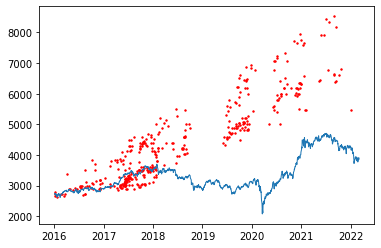

In [12]:
coeff = y1[0] / y2[0]
scaled_y2 = [v * coeff for v in y2]

plt.figure()
plt.scatter(x1, y1, s=2, color='red')
plt.plot(x2, scaled_y2, linewidth=1)
plt.show()

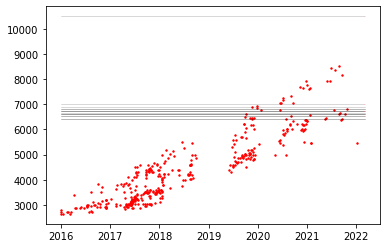

In [13]:
plt.figure()
plt.scatter(x1, y1, s=2, color='red')
ax = plt.gca()

now = datetime.datetime.now()
started_at = datetime.date(start_year, start_month, start_date)
for e in orderbook:
  price = e['price'] / e['size'] 
  l1 = mlines.Line2D([e['confirmed_at'], started_at], [price, price], color=(0.0, 0, 0, 0.3), linewidth=0.5)
  l2 = mlines.Line2D([e['confirmed_at'], now], [price, price], color=(1.0, 0, 0, 0.3), linewidth=0.5)
  ax.add_line(l1)
  ax.add_line(l2)
plt.show()